# 첫 번째 합성곱 신경망

## 라이브러리 임포트

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar10

## 데이터 적재

In [2]:
NUM_CLASSES = 10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(X_train[54,12,13,1])

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
0.36862746


## 모델 만들기

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1= Conv2D(
    filters = 10
        , kernel_size = (4,4)
        , strides = 2
        , padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
        , kernel_size = (3,3)
        , strides = 2
        , padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_layer = Input((32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

## 모델 훈련

In [10]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [11]:
with tf.device('/GPU:0'):
    model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)
    # model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 4ms/step - loss: 1.5500 - accuracy: 0.4591
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1464 - accuracy: 0.5969
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9925 - accuracy: 0.6523
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9149 - accuracy: 0.6826
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8580 - accuracy: 0.7005
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8089 - accuracy: 0.7180
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7644 - accuracy: 0.7328
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7253 - accuracy: 0.7458
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6881 - accuracy: 0.7610
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.65

In [13]:
model.layers[6].get_weights()

[]

## 모델 평가

In [14]:
model.evaluate(X_test,y_test, batch_size=100)

100/100 [==============================] - 1s 2ms/step - loss: 0.8721 - accuracy: 0.7110


[0.8721480369567871, 0.7110000252723694]

In [15]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


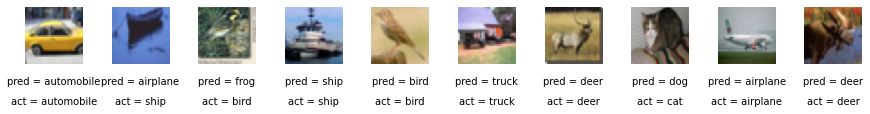

In [20]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [ ]:
# 합성곱은 네트워크가 아니라 심층 신경망 안에 있는 층이다.
# '합성곱 신경망'은 실제로는 '합성곱 층이 있는 신경망'을 의미함